In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

salary_data = pd.read_csv('salary.csv')
salary_data.head()


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## 1. How many responders are there? Are there any missing values in any of the variables?

In [2]:
print(len(salary_data))
print(salary_data.isnull().sum())

514
salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64


In total there are 514 responders, There is currently one missing variable in the Salary column, which could mean that either the information was not entered intentionally or ommited by mistake. This does have a affect on the way we red our data, as from the beginning this value should be dropped or either replaced in order not to affect our models.

## 2. What is the lowest salary and highest salary in the group?

In [3]:
print(salary_data['salary'].min())
print(salary_data['salary'].max())

29000.0
96156.0


The minimum salary is 29000.00 and the highest was 96156.00

## 3. What is the mean salary for the sample? Include the standard error of the mean.

In [4]:
print(salary_data['salary'].mean())
print(salary_data['salary'].sem())

50863.22009783626
560.0622753925232


The mean for the salary 50863.22009783626, meaning that the avaerage salary of the dat was about 50863.22, which is considerably where most people are earning, with exception to a ffew outliers, and the standard error of the mean was 560.0622753925232, which is the estimated error for the model.


## 4. What is the standard deviation for the years worked?

In [5]:
print(salary_data['yearsworked'].std())

9.444695144169813


The standard deviation for the years worked is 9.444695144169813. this shows that the  the data points are spread out over a wider range of values. There are multiple data points between the minimum and maximum values.

## 5. What is the median salary for the sample?

In [6]:
print(salary_data['salary'].median())

50096.0


The median for the salary is 50096.0, which is close to what the average salary is. This shows that the data set has a symmetrical distribution. This represents the balancing points in the dataset.

## 6. What is the interquartile range for salary in the sample?

In [7]:
q1 = salary_data['salary'].quantile(0.25)
q3 = salary_data['salary'].quantile(0.75)
print(q3 - q1)

# salary_data.describe()

20345.0


The interquartile range is Q3 - Q1, which is 20345, this describes the middle 50% of the values. The interquartile is often seen as a better measure of spread than the range as it is not affected by outliers. 

## 7.How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [8]:
men = salary_data['male'].value_counts()
men = men.to_frame(name = 'Number')
men.rename(index = {1:'Male',0:'Female'}, inplace = True)
men

# men_sample = men.to_frame()
# men_sample.rename(index={0:'Female',1:'Male'}, inplace=True)
# men_sample.columns = ["Gender"]



,Number
Male,386
Female,128


There is a total of 386 men and 128 women

## 8. How many women are executives compared to men?

In [9]:
women_execs = ((salary_data['position'] == 3) & (salary_data['male'] == 0))
men_execs = ((salary_data['position'] == 3) & (salary_data['male'] == 1)) 
print(women_execs.value_counts().iloc[1])
print(men_execs.value_counts().iloc[1])


19
192


There are a total of 19 women executives and 192 male executives, which means there are 173 more male executives

## 9. Create a histogram for the variable Salary.

Text(0, 0.5, 'Number of People')

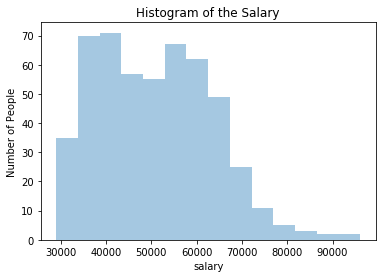

In [10]:
my_salary = salary_data['salary'].fillna(salary_data['salary'].mean())
sns.distplot(my_salary, kde = False)
plt.title('Histogram of the Salary')
plt.ylabel('Number of People')
# sns.distplot(salary_data['salary'], kde = False)



## 10. Examine the histogram and describe the distribution for Salary.

The distribution for the salary is moderately skewed to the right, this implies that the majority of the sample earn within the interquartile range. With this observed a few people earned within the quartile 4, the average of the sample earned within the median.The last few bars make the data skew to the right. The peaks for the histogram are at the median, this implies that the number of executives do not have such a major influence of the salary spread.

In [11]:
salary_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

In [12]:
import scipy as sp

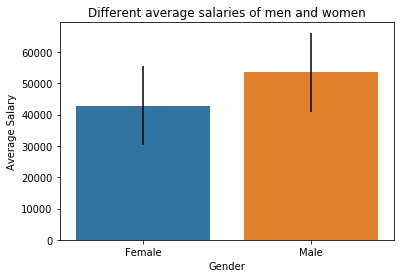

In [13]:
average_salary = salary_data['salary'].groupby(salary_data['male']).mean()
average_salary = average_salary.to_frame()
average_salary.index = ['Female','Male']
sal_std = salary_data['salary'].std()
sns.barplot(x=average_salary.index, y="salary", data=average_salary,yerr = sal_std, ci = 95)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Different average salaries of men and women')
plt.show()

The average men earn more than the average women, data shows that the mean for salary is in favour for men, with previous data we came accross that there are 173 more men execs than female. This factor plays a major role seeing that the execs tend to earn more than general workers and these factors influence greatly on the mean.

## 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). 


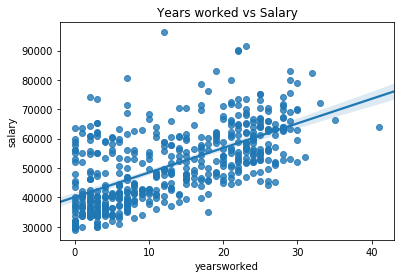

In [14]:
sns.regplot(x = salary_data['yearsworked'], y = my_salary)
plt.title('Years worked vs Salary')
plt.show()


The more years worked and salary have a positvely strong relationship, although correlation is not equal to causation. 

### What is the relationship between Years Worked and Salary?

There is a positive relationship between Years worked and Salary, excluding a few outliers, 
the amount of years work will tend to increase the salary of a person. The positive relationship means that the salary is dependant on the years worked. 

### Describe any patterns in the scatterplot.

The data is concentrated around the trend line, proving that the there is a strong correlation between the years worked and salary, within the first 30 years there is a lot of data point thats fall in, there is a few outliers as we can see there is a person who earns more than 90000 with less than 20 years experience

### Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they?  In what way are they different?)

In [36]:
salary_data.loc[salary_data['salary'] == salary_data['salary'].max()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


In [35]:
salary_data.loc[salary_data['yearsworked'] > 40]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
382,64109.0,0,41,28,0.91,1,0,3,1,2,0


Yes there is a person who has worked 12 years and earns 96156, the trend line shows that this scenario usually takes place when a person has worked well over 20 years. They have a degree and are in a executive postion, this person is seen as an outlier or anomaly in our data set.There is a person who as also worked  41 years althought this person still seems to be earning 64 years, this is a outlier in terms of our years worked to salary, it assumed that this person wopuldbe earning 70000 plus.

## 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary

In [39]:
from scipy.stats import pearsonr
pearsonr_func =pearsonr(salary_data['yearsworked'], salary_data['salary'].fillna(salary_data['salary'].mean()))
pearsonr_func

# p = pearsonr(salary_data['yearsworked'], my_salary)
# print(p

(0.6231354820920553, 1.2747795189687997e-56)

### Interpret the size and direction of the correlation statistic.

There is a strong positive correlation to years worked and salary, this implies that theres a moderatley great strength between the two variables. The salary is greatly reliant on the years worked for a person. The years will have a positive impact on the salary,, if one increases so does the other, vice versa.

### Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

Conversely the p-value is close to 0, this means there is no correlation at all. Whether the years affect the salary or not, Their years do not directly affect the salary.